**Name - Piyush Rastogi**

**Data Science and Business Analytics Task**

***Batch February 2023***


# **Task 6: Prediction using Decision Tree Algorithm**
          
          (Level - Intermediate)

The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.This includes supervised learning.

The steps demonstrated in this notebook are:

1. Loading the data
2. Familiarizing with data
3. Visualizing the data
4. Splitting the data
5. Model Building & Training
6. Tree Visualisation
7. Conclusion

**1. Loading Data:**

The dataset is borrowed from https://bit.ly/3kXTdox . The overview of this dataset is, it has 150 samples with 6 features. Download the dataset from the link provided.

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading data into dataframe

data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**2. Familiarizing with Data:**

In this step, few dataframe methods are used to look into the data and its features.

In [3]:
#Shape of dataframe

data.shape

(150, 6)

In [4]:
#Listing the features of the dataset

data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#checking for number of null value

data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
# describtion of dataset

data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
#calculating correlation among data

data.corr().abs()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,0.109369,0.871754,0.817954
SepalWidthCm,0.397729,0.109369,1.000000,0.420516,0.356544
PetalLengthCm,0.882747,0.871754,0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,0.356544,0.962757,1.000000


In [9]:
#count by Species

data.groupby(['Species']).count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


**3. Visualizing the data:**

Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

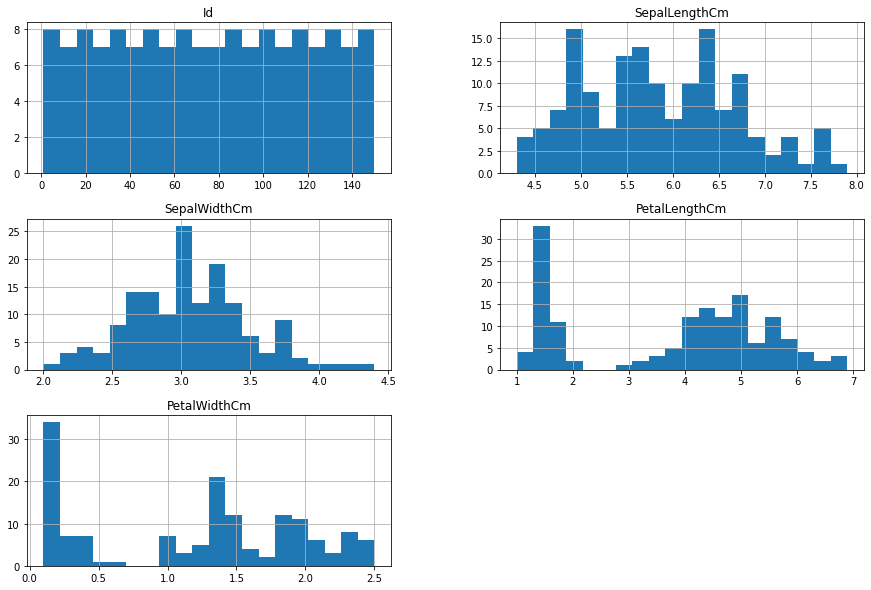

In [10]:
data.hist(bins = 20,figsize = (15,10));

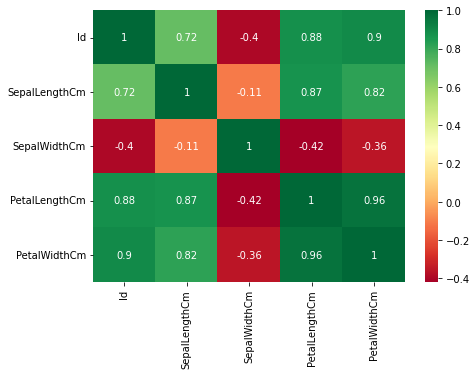

In [11]:
#Correlation heatmap

plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True,cmap="RdYlGn")
plt.show()

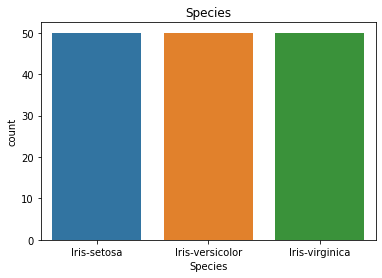

In [12]:
#countplot for Species

sns.countplot(x='Species',data=data)
plt.title('Species')
plt.show()

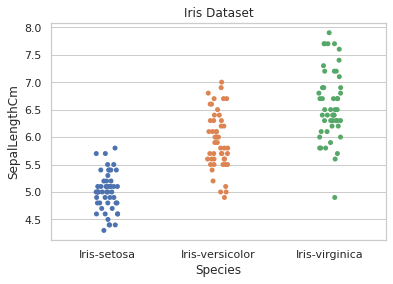

In [13]:
sns.set(style = 'whitegrid')
sns.stripplot(x ='Species',y = 'SepalLengthCm',data = data);
plt.title('Iris Dataset')
plt.show()

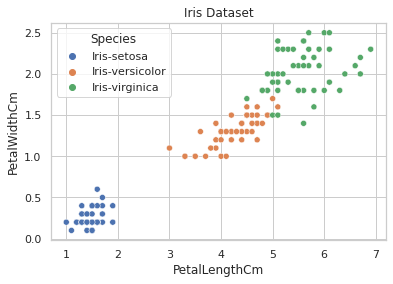

In [14]:
#scatterplot based on Species

sns.set(style = 'whitegrid')
sns.scatterplot(x ='PetalLengthCm',y = 'PetalWidthCm',hue="Species",data = data);
plt.title('Iris Dataset')
plt.show()

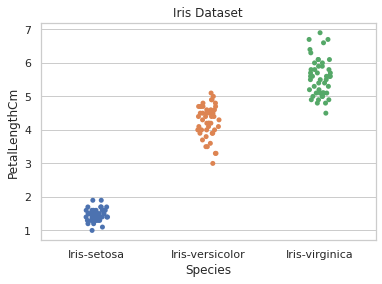

In [15]:
sns.set(style = 'whitegrid')
sns.stripplot(x ='Species',y = 'PetalLengthCm',data = data);
plt.title('Iris Dataset')
plt.show()

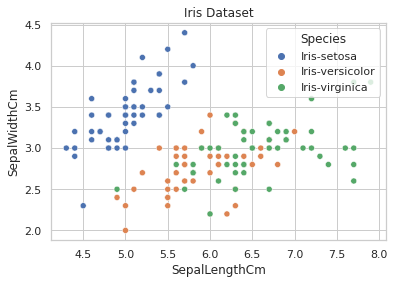

In [16]:
#scatterplot based on Species

sns.set(style = 'whitegrid')
sns.scatterplot(x ='SepalLengthCm',y = 'SepalWidthCm',hue="Species",data = data);
plt.title('Iris Dataset')
plt.show()

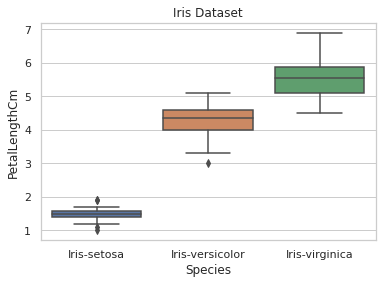

In [17]:
sns.boxplot(x='Species',y='PetalLengthCm',data=data)
plt.title("Iris Dataset")
plt.show()

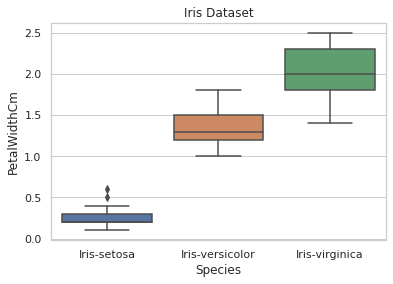

In [18]:
sns.boxplot(x='Species',y='PetalWidthCm',data=data)
plt.title("Iris Dataset")
plt.show()

***4. Splitting the Data:***

The data is split into train & test sets, 80-20 split.

In [21]:
# Sepratating & assigning features and target columns to X & y

y = data['Species']
X = data.drop(['Species',"Id"],axis=1)
X.shape, y.shape

((150, 4), (150,))

In [22]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((120, 4), (30, 4))

**5. Model Building & Training:**

Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.

In [23]:
# Decision Tree regression model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
dtc = DecisionTreeClassifier()
# fit the model 
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
#predicting the target value from the model for the samples
y_test_tree = dtc.predict(X_test)
y_train_tree = dtc.predict(X_train)

In [25]:
print(dtc.score(X_test,y_test_tree))
print(dtc.score(X_train,y_train_tree))

1.0
1.0


In [26]:
# performance calculation
from sklearn.metrics import classification_report
print(classification_report(y,dtc.predict(X)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       1.00      1.00      1.00        50
 Iris-virginica       1.00      1.00      1.00        50

       accuracy                           1.00       150
      macro avg       1.00      1.00      1.00       150
   weighted avg       1.00      1.00      1.00       150



In [27]:
# confusion_matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y,dtc.predict(X),labels=data['Species'].unique()))

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


**6. Tree Visualization:**

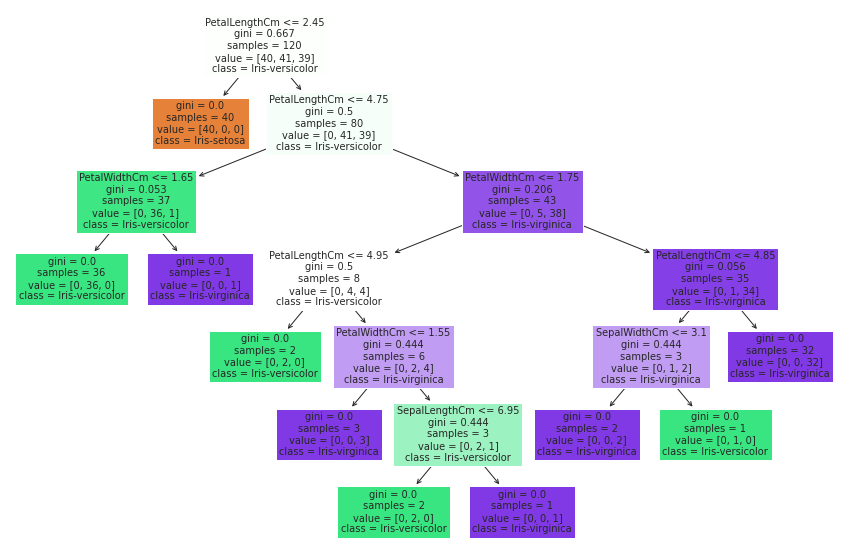

In [28]:
#importing tree function for Visualization

from sklearn import tree
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
tree.plot_tree(dtc,feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'] ,
               class_names = data['Species'].unique(), filled=True)
plt.show()

**7. Conclusion**:

The final take away form this project is the working of Classification model on a dataset and understanding their parameters. Here we use Decision Tree Algorithm for prediction. Creating this notebook helped me to learn a lot about the parameters of the models. We have successfully Create the Decision Tree classifier and visualize it graphically.